In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
f = '.......\Wang_scopus.csv'
data = pd.read_csv(f)
print(data.shape)
print(data.info())
data.head()

(86, 43)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 43 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        86 non-null     object 
 1   Author(s) ID                   86 non-null     object 
 2   Title                          86 non-null     object 
 3   Year                           86 non-null     int64  
 4   Source title                   86 non-null     object 
 5   Volume                         73 non-null     object 
 6   Issue                          61 non-null     object 
 7   Art. No.                       9 non-null      float64
 8   Page start                     69 non-null     object 
 9   Page end                       68 non-null     object 
 10  Page count                     1 non-null      float64
 11  Cited by                       75 non-null     float64
 12  DOI                            82 non-null 

,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,"Cunningham E.C., Wang R.F., Beck D.M.",22949926800;55666518500;7202933505;,Effects of Rhythmic Auditory Stimulation on Vi...,2022,Journal of Experimental Psychology: Human Perc...,48,11,NaN,1153,1171,...,NaN,JPHPD,NaN,English,J. Exp. Psychol. Hum. Percept. Perform.,Article,Final,NaN,Scopus,2-s2.0-85138054346
1,"Widdowson C., Wang R.F.",57192916380;55666518500;,Human spatial learning strategies in wormhole ...,2022,Spatial Cognition and Computation,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,English,Spat. Cogn. Comput.,Article,Article in Press,NaN,Scopus,2-s2.0-85133541254
2,"Widdowson C., Wang R.F.",57192916380;55666518500;,Human navigation in curved spaces,2022,Cognition,218,NaN,104923.0,NaN,NaN,...,NaN,CGTNA,34638034.0,English,Cognition,Article,Final,NaN,Scopus,2-s2.0-85116889720
3,"Zukosky M., Wang R.F.",57202782245;55666518500;,Spontaneous state alternations in the time cou...,2021,Cognition,212,NaN,104689.0,NaN,NaN,...,NaN,CGTNA,33780750.0,English,Cognition,Article,Final,"All Open Access, Bronze",Scopus,2-s2.0-85103237623
4,"Sampaio C., Wang R.F.",7006878471;55666518500;,Preference for Prior Probabilities of Position...,2021,Journal of Experimental Psychology: Learning M...,48,11,NaN,1590,1597,...,NaN,JPHMD,33764126.0,English,J. Exp. Psychol. Learn. Mem. Cogn.,Article,Final,NaN,Scopus,2-s2.0-85108977113


In [ ]:
# Publication count
data.shape[0]

86

In [ ]:
# Publication count & cumulative publication count - by years
pub_yr = data.groupby(['Year'])[['EID']].count()
pub_yr = pub_yr.rename(columns={'EID':'pub_count'})
pub_yr = pub_yr.reset_index()
pub_yr['cum_pub_count'] = pub_yr['pub_count'].cumsum()
pub_yr['cum_pub_count%'] = pub_yr['cum_pub_count']/pub_yr['pub_count'].sum()*100
pub_yr

,Year,pub_count,cum_pub_count,cum_pub_count%
0,1997,1,1,1.162791
1,1998,1,2,2.325581
2,1999,5,7,8.139535
3,2000,3,10,11.627907
4,2001,1,11,12.790698
5,2002,7,18,20.930233
6,2003,9,27,31.395349
7,2004,2,29,33.720930
8,2005,2,31,36.046512
9,2006,3,34,39.534884


In [ ]:
np.arange(0, 22, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20])

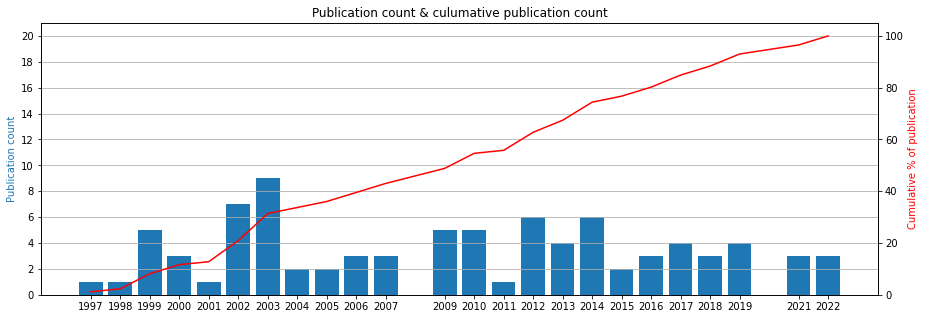

In [ ]:
# Plot: Publication count & culumative publication count - by years
fig, ax = plt.subplots(figsize=(15, 5))

ax.bar(pub_yr['Year'], pub_yr['pub_count'])
ax.set_xticks(pub_yr['Year'])
ax.yaxis.grid()
ax.set_ylim(0, 21)
ax.set_yticks(np.arange(0, 21, 2))
ax.set_ylabel('Publication count', color='tab:blue')

ax2 = ax.twinx()

ax2.plot(pub_yr['Year'], pub_yr['cum_pub_count%'], color='red')
ax2.set_ylim(0, 105)
ax2.set_ylabel('Cumulative % of publication', color='red')

ax.set_title('Publication count & culumative publication count')

plt.show()

In [ ]:
# Publication types

pub_type = data.groupby(['Document Type'])[['EID']].count()
pub_type = pub_type.rename(columns={'EID':'pub_count'})
pub_type = pub_type.sort_values(by=['pub_count'])
pub_type

,pub_count
Document Type,
Note,1
Book Chapter,3
Review,6
Conference Paper,14
Article,62


i=0, count=1
i=1, count=3
i=2, count=6
i=3, count=14
i=4, count=62


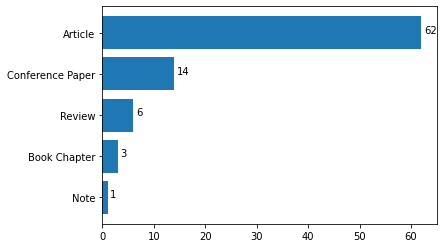

In [ ]:
# Plot: Publication types

fig, ax = plt.subplots(figsize=(6, 4))

ax.barh(pub_type.index, pub_type['pub_count'])

#ax.text(x=30, y=3, s='TEXT')

for i, count in enumerate(pub_type['pub_count']):
    print(f'i={i}, count={count}')
    ax.text(x=count+0.5, y=i, s=count)

plt.show()

Citations
A stacked bar chart shows the percentages of cited and uncited papers in each publication year.

In [ ]:
# Get a subset of dataframe that contains EID, Year, and Citation count
citations = data[['EID', 'Year', 'Cited by']].copy() # Values in the Cited by column are citation counts

# In Scopus data, the Cited By values for papers with no citations are NaN.
citations['Cited by'] = citations['Cited by'].fillna(0) # Replace NaNs with 0s.

# Create a column, uncited, to show whether a paper has been cited or not.
citations['uncited'] = False
citations.loc[citations['Cited by']==0, 'uncited'] = True

citations.head()

,EID,Year,Cited by,uncited
0,2-s2.0-85138054346,2022,0.0,True
1,2-s2.0-85133541254,2022,0.0,True
2,2-s2.0-85116889720,2022,5.0,False
3,2-s2.0-85103237623,2021,3.0,False
4,2-s2.0-85108977113,2021,0.0,True


In [ ]:
# Prepare a dataframe for making a visulaization

header = ['Year', 'Number of cited papers', 'Number of uncited papers',
          'Percentage of cited papers', 'Percentage of uncited papers']

df_for_viz = []
for year in citations['Year'].unique(): # Iterate over the unique publication years in the data.

    filter_1 = citations['Year'] == year # For selecting papers published in the year
    filter_2 = citations['Cited by'] == 0 # For selecting papers that have never been cited
    filter_3 = citations['Cited by'] > 0 # For selecting papers that have at least one citation

    # Select the papers that were published in the year and have at least one citation.
    cited_papers = citations.loc[(filter_1)&(filter_3)]

    # Select the papers that were published in the year and have no citation.
    uncited_papers = citations.loc[(filter_1)&(filter_2)]

    # The numbers of cited and uncited papers
    number_of_cited_papers = cited_papers.shape[0]
    number_of_uncited_papers = uncited_papers.shape[0]

    # The percentages of cited and uncited papers
    percentage_of_cited_papers = number_of_cited_papers/(number_of_cited_papers+number_of_uncited_papers)*100
    percentage_of_cited_papers = round(percentage_of_cited_papers, 2)
    percentage_of_uncited_papers = number_of_uncited_papers/(number_of_cited_papers+number_of_uncited_papers)*100
    percentage_of_uncited_papers = round(percentage_of_uncited_papers, 2)

    # A row in the dataframe, df_for_viz
    row = [year, number_of_cited_papers, number_of_uncited_papers,
           percentage_of_cited_papers, percentage_of_uncited_papers]

    df_for_viz.append(row)

df_for_viz = pd.DataFrame(df_for_viz, columns=header)
df_for_viz = df_for_viz.sort_values(by='Year') # Sort dataframe by years, from smallest to largest
df_for_viz

,Year,Number of cited papers,Number of uncited papers,Percentage of cited papers,Percentage of uncited papers
23,1997,1,0,100.00,0.00
22,1998,1,0,100.00,0.00
21,1999,5,0,100.00,0.00
20,2000,3,0,100.00,0.00
19,2001,1,0,100.00,0.00
18,2002,6,1,85.71,14.29
17,2003,9,0,100.00,0.00
16,2004,2,0,100.00,0.00
15,2005,2,0,100.00,0.00
14,2006,3,0,100.00,0.00


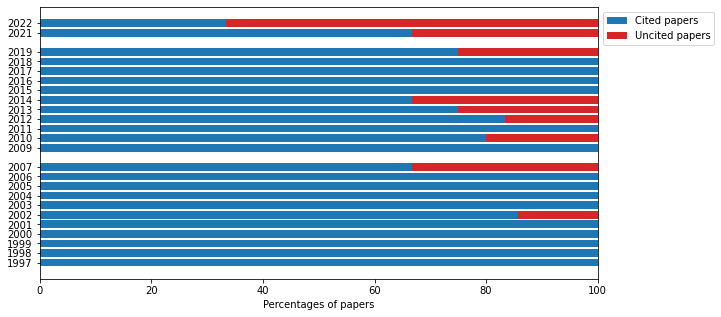

In [ ]:
# Make the stacked bar chart:

fig, ax = plt.subplots(figsize=(10, 5))

# First step: A bar chart showing the percentages of cited papers in each year
ax.barh(df_for_viz['Year'], df_for_viz['Percentage of cited papers'], color='tab:blue')

# Second step: A bar chart showing the percentages of uncited papers in each year
# These bars are stacked right to the bars made in step 1.
ax.barh(df_for_viz['Year'], df_for_viz['Percentage of uncited papers'], color='tab:red',
        left=df_for_viz['Percentage of cited papers']) # "left =" tells matplotlib the starting points of the second set of bars.

ax.set_yticks(df_for_viz['Year'])
ax.set_xlabel('Percentages of papers')
ax.legend(['Cited papers', 'Uncited papers'], bbox_to_anchor=(1, 1)) # The figure legend

plt.show()

In [ ]:
# The citation count of each paper will be normalized by the average number of citations of all documents published in the same year.

prep = citations.groupby(['Year']).agg({'EID': 'count', 'Cited by': 'sum'})
# .agg() is for performing different operations on different columns
# >> For each year, (1) count the number of papers, and (2) get the sum of citation counts for papers published in the year

prep = prep.rename(columns={'EID':'publication_count', 'Cited by':'citation_count'})

# Get the average number of citations of all documents published in the same year.
prep['average_citation_count'] = prep['citation_count']/prep['publication_count']
prep = prep.reset_index()
prep

,Year,publication_count,citation_count,average_citation_count
0,1997,1,1.0,1.000000
1,1998,1,234.0,234.000000
2,1999,5,324.0,64.800000
3,2000,3,344.0,114.666667
4,2001,1,240.0,240.000000
5,2002,7,648.0,92.571429
6,2003,9,421.0,46.777778
7,2004,2,66.0,33.000000
8,2005,2,32.0,16.000000
9,2006,3,112.0,37.333333


In [ ]:
# Assign year ranges

# Generate year ranges
for yr in np.arange(1997, 2022, 5):
    yr_right = yr + 4
    if yr == 2020:
        yr_right = 2022
    print(yr, yr_right) # yr is the left boundry, and yr_right is the right boundry

    # Assign year ranges to a column, year_range
    citations.loc[citations['Year'].between(yr, yr_right, inclusive='both'), 'year_range'] = f'{yr}-{yr_right}'
citations

1997 2001
2002 2006
2007 2011
2012 2016
2017 2021


,EID,Year,Cited by,uncited,year_range,average_citation_count,normalized_citation_count
0,2-s2.0-85138054346,2022,0.0,True,2020-2022,1.666667,0.000000
1,2-s2.0-85133541254,2022,0.0,True,2020-2022,1.666667,0.000000
2,2-s2.0-85116889720,2022,5.0,False,2020-2022,1.666667,3.000000
3,2-s2.0-85103237623,2021,3.0,False,2017-2021,4.666667,0.642857
4,2-s2.0-85108977113,2021,0.0,True,2017-2021,4.666667,0.000000
...,...,...,...,...,...,...,...
81,2-s2.0-0345161503,1999,197.0,False,1997-2001,64.800000,3.040123
82,2-s2.0-0033331101,1999,7.0,False,1997-2001,64.800000,0.108025
83,2-s2.0-0012840557,1999,24.0,False,1997-2001,64.800000,0.370370
84,2-s2.0-0141826543,1998,234.0,False,1997-2001,234.000000,1.000000


In [ ]:
# Check year range results

# Group the dataframe by year_range values, and get the unique year values
citations.groupby(['year_range'])['Year'].apply(set)

year_range
1997-2001    {1997, 1998, 1999, 2000, 2001}
2002-2006    {2002, 2003, 2004, 2005, 2006}
2007-2011          {2009, 2010, 2011, 2007}
2012-2016    {2016, 2012, 2013, 2014, 2015}
2017-2021          {2017, 2018, 2019, 2021}
2020-2022                            {2022}
Name: Year, dtype: object

In [ ]:
# Group citations df by year ranges. This is for preparing a dataframe for making the boxplot

# The .apply(list) saves the normalized_citation_count values in each year range into a list
df_boxplot = citations.groupby(['year_range'])['normalized_citation_count'].apply(list).to_frame()
df_boxplot

,normalized_citation_count
year_range,
1997-2001,"[1.0, 2.6686046511627906, 0.1744186046511628, ..."
2002-2006,"[0.375, 1.044642857142857, 1.5803571428571428,..."
2007-2011,"[1.0, 1.6216216216216215, 0.9459459459459459, ..."
2012-2016,"[2.135593220338983, 0.2542372881355932, 0.6101..."
2017-2021,"[0.6428571428571428, 0.0, 2.357142857142857, 0..."
2020-2022,"[0.0, 0.0, 3.0]"


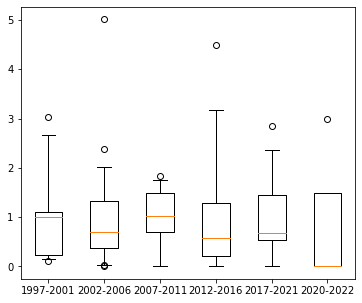

In [ ]:
# Make a box plot

fig, ax = plt.subplots(figsize=(6, 5))

ax.boxplot(df_boxplot['normalized_citation_count'],
           whis=[5, 95]) # Set whiskers covers from the 5th percentile to the 95th percentile

ax.set_xticklabels(df_boxplot.index)

plt.show()